<a href="https://colab.research.google.com/github/akh7045-hub/Adcom/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install yfinance

In [ ]:
##Importing
from datetime import timedelta
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
##Importing and reading data
fda = pd.read_csv('https://raw.githubusercontent.com/akhamuro/NYU-Bootcamp-Midterm/refs/heads/main/realfdadata.csv')
fda.head()

,Adcom Commitee,Date,Adcom center,Sponsor,Sponsor ticker,"Voting Outcome (1 - Positive, 0 - Negative)","Rare disease (1-Yes, 0-No)",Therapeutic area,"First in Class (1-Yes, 0-No)",Drug name
0,Vaccines and Related Biological Products Advis...,2024-03-05,CBER,NaN,NaN,NaN,0,Infectious Diseases,0,NaN
1,Medical Imaging Drugs Advisory Committee,2024-03-05,CDER,Lumicell,NaN,1.0,0,Oncology,1,Pegulicianine
2,Oncologic Drugs Advisory Committee,2024-03-14,CDER,Geron Corporation,GERN,1.0,1,Oncology,1,Imetelstat
3,Oncologic Drugs Advisory Committee,2024-03-15,CDER,Johnson & Johnson,JNJ,1.0,1,Oncology,0,Carvykti
4,Oncologic Drugs Advisory Committee,2024-03-15,CDER,Bristol Myers Squibb,BMY,1.0,1,Oncology,1,Abecma


In [ ]:
# Convert the 'date column to datetime objects
fda['Date'] = pd.to_datetime(fda['Date'], errors='coerce')

In [ ]:
# Drop rows with missing dates, sponsor tickers and voting outcomes
fda.dropna(subset=['Date', 'Sponsor ticker','Voting Outcome (1 - Positive, 0 - Negative)'], inplace=True)

In [ ]:
##This creates empty lists to create a dataframe with
prices = []
company_names = []
outcomes = []
decision_dates = []

In [ ]:
##This loops through each company in the fda data
for index, row in fda.iterrows():
    ticker = row['Sponsor ticker']
    date = row['Date']
    company_name = row['Sponsor']
    outcome = row['Voting Outcome (1 - Positive, 0 - Negative)']

    #Calculate the start and end dates for acccessing stock prices of company
    #We decided on a 60 day range, 30 days before and after the outcome of the drug came out
    start_date = date - timedelta(days=60)
    end_date = date + timedelta(days=60)

    #Get stock price history for the 60-day range
    curr = yf.Ticker(ticker)
    hist = curr.history(start=start_date, end=end_date)[['Open', 'Close']] ##This gets open and closing prices

    #If the prices are available to be accessed, add relevant information into the empty lists
    if not hist.empty:
      prices.append(hist)
      company_names.append(company_name)
      outcomes.append(outcome)
      decision_dates.append(date)

ERROR:yfinance:$BMY : possibly delisted; no price data found  (1d 2024-01-15 00:00:00 -> 2024-05-14 00:00:00) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$LLY : possibly delisted; no price data found  (1d 2024-04-11 00:00:00 -> 2024-08-09 00:00:00) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$AZN : possibly delisted; no timezone found
ERROR:yfinance:$ZVRA : possibly delisted; no timezone found
ERROR:yfinance:$ICPT: possibly delisted; no timezone found
ERROR:yfinance:$BMY : possibly delisted; no price data found  (1d 2024-07-28 00:00:00 -> 2024-11-25 00:00:00) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$ONC : possibly delisted; no timezone found
ERROR:yfinance:$LXRX : possibly delisted; no timezone found
ERROR:yfinance:$AZN : possibly delisted; no timezone found
ERROR:yfinance:$ : possibly delisted; no timezone found
ERROR:yfinance:$MRNA : possibly delisted; no timezone found
ERROR:yfinance:$MRNA : possibl

In [ ]:
##Making sure each list is the same length to put in data frame
print(len(prices))
print(len(company_names))
print(len(outcomes))
print(len(decision_dates))

4
4
4
4


In [ ]:
##Create a data frame with the filled lists
df = pd.DataFrame({'Prices': prices, 'Company Name': company_names, 'Outcome': outcomes, 'Date' : decision_dates})

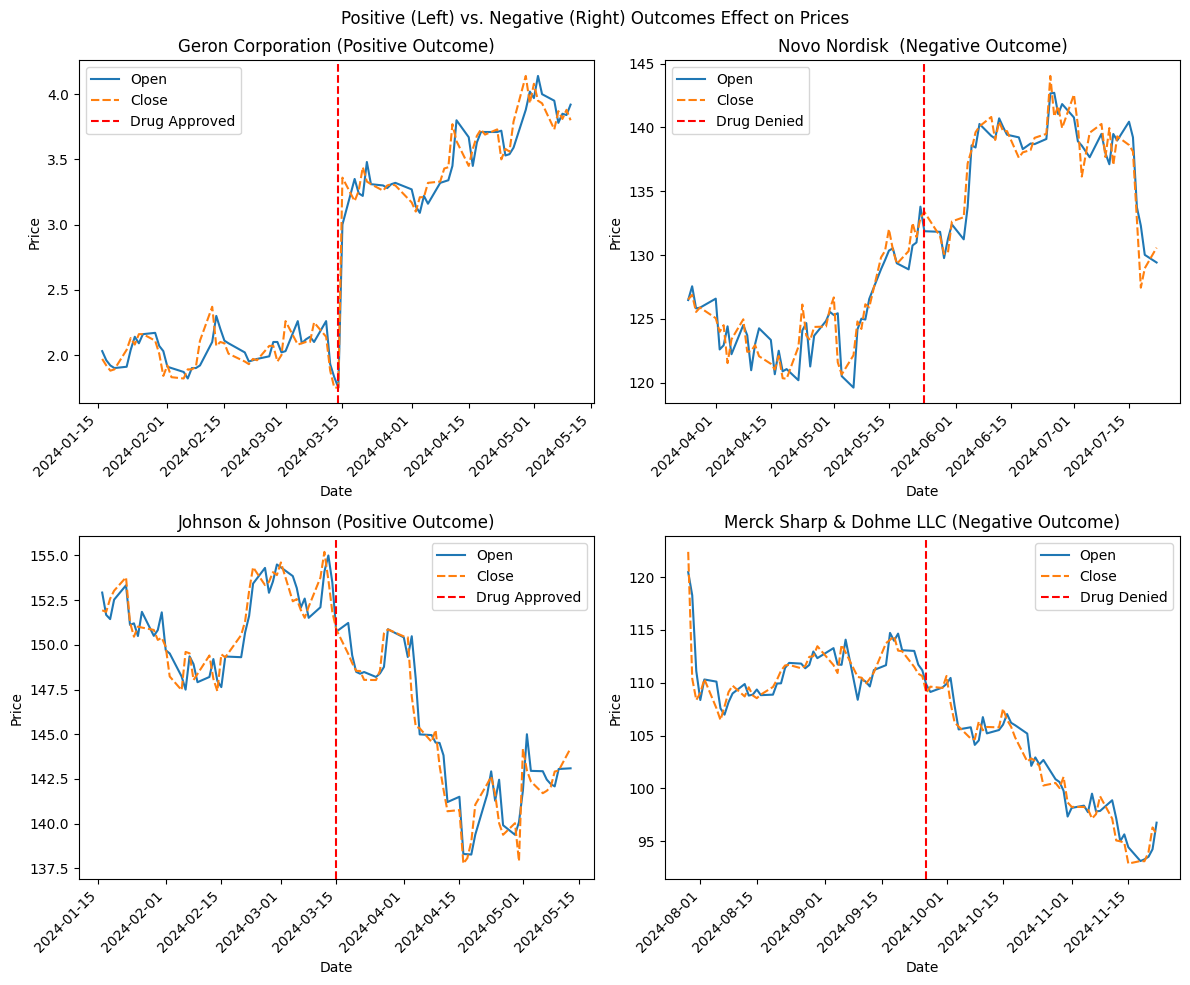

In [ ]:
##Creating four subplots since there is relevant data for 4 companies
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

##Add a main title to the entire figure
fig.suptitle('Positive (Left) vs. Negative (Right) Outcomes Effect on Prices') # Adjusted title position

##This will help detemine which subplot to plot on in the loop
pos_ind = 0
neg_ind = 0

##Iterate through each row of the data frame
for index, row in df.iterrows():
  outcome = row['Outcome']
  prices_df = row['Prices']
  company_name = row['Company Name']
  event_date = row['Date']

  ##If the voting outcome is positive, plot it on a subplot on the left side
  if row['Outcome'] == 1.0:
    sns.lineplot(data=prices_df, ax=axes[pos_ind, 0])
    axes[pos_ind, 0].set_title(f"{company_name} (Positive Outcome)")##Title the plot
    axes[pos_ind, 0].set_xlabel("Date") ##Add x-axis label to each subplot
    axes[pos_ind, 0].set_ylabel("Price") ##Add y-axis label to each subplot
    plt.setp(axes[pos_ind, 0].get_xticklabels(), rotation=45, ha="right") ##Rotate the dates 45 degrees for better visibility
    axes[pos_ind, 0].axvline(x=event_date, color='red', linestyle='--', label='Drug Approved') ##Create a vertical line where the decision on the drug was released
    axes[pos_ind, 0].legend() ##Add legend
    pos_ind += 1
  ##If the voting outcome is negative, plot it on a subplot on the right side
  elif outcome == 0.0:
    sns.lineplot(data=prices_df, ax=axes[neg_ind, 1])
    axes[neg_ind, 1].set_title(f"{company_name} (Negative Outcome)")##Title the plot
    axes[neg_ind, 1].set_xlabel("Date") ##Add x-axis label to each subplot
    axes[neg_ind, 1].set_ylabel("Price") ##Add y-axis label to each subplot
    plt.setp(axes[neg_ind, 1].get_xticklabels(), rotation=45, ha="right") #Rotate the dates 45 degrees for better visibility
    axes[neg_ind, 1].axvline(x=event_date, color='red', linestyle='--', label='Drug Denied') ##Create a vertical line where the decision on the drug was released
    axes[neg_ind, 1].legend() ##Add legend
    neg_ind += 1


plt.tight_layout()
plt.show()